Importing necessary library that will be used in model building.


In [200]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam


In [201]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

In [202]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load and return the breast cancer classification dataset.

In [203]:
cancer = datasets.load_breast_cancer()

Description of cancer dataset

In [204]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

We will create a dataframe with our cancer data and target data. It would help us to store all the inputs and outputs in one dataframe.

In [205]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [206]:
y = cancer.target

In [207]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [208]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [209]:
X.shape

(569, 30)

Split the dataset in a random manner. We will be using a SciKit library named train_test_split. We will be using 90% of our dataset for training purposes and 10% for testing.

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0, stratify = y)

In [211]:
X_train.shape

(512, 30)

In [212]:
X_test.shape

(57, 30)

We will use StandardScaler, which removes the mean and scales the data to unit variance.

In [213]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [214]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

Build CNN model
 

In [215]:
epochs = 35
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [216]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 29, 16)            48        
_________________________________________________________________
batch_normalization_18 (Batc (None, 29, 16)            64        
_________________________________________________________________
dropout_27 (Dropout)         (None, 29, 16)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 28, 32)            1056      
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 32)            128       
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 32)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 896)              

Compile defines the loss function, the optimizer, and the metrics.

In [217]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

Train the model for a fixed number of epochs (iterations on a dataset).

In [218]:
%%time
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/35
16/16 [==============================] - 1s 25ms/step - loss: 0.7946 - accuracy: 0.5949 - val_loss: 0.6408 - val_accuracy: 0.7895
Epoch 2/35
16/16 [==============================] - 0s 9ms/step - loss: 0.5100 - accuracy: 0.7779 - val_loss: 0.5735 - val_accuracy: 0.8246
Epoch 3/35
16/16 [==============================] - 0s 11ms/step - loss: 0.3509 - accuracy: 0.8691 - val_loss: 0.5211 - val_accuracy: 0.8070
Epoch 4/35
16/16 [==============================] - 0s 9ms/step - loss: 0.2754 - accuracy: 0.8879 - val_loss: 0.4817 - val_accuracy: 0.8070
Epoch 5/35
16/16 [==============================] - 0s 8ms/step - loss: 0.2007 - accuracy: 0.9312 - val_loss: 0.4501 - val_accuracy: 0.7719
Epoch 6/35
16/16 [==============================] - 0s 9ms/step - loss: 0.1901 - accuracy: 0.9363 - val_loss: 0.4225 - val_accuracy: 0.7895
Epoch 7/35
16/16 [==============================] - 0s 10ms/step - loss: 0.2081 - accuracy: 0.9261 - val_loss: 0.3975 - val_accuracy: 0.8246
Epoch 8/35
16/16 

In [219]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [220]:
history.history

{'accuracy': [0.642578125,
  0.8046875,
  0.880859375,
  0.8984375,
  0.92578125,
  0.927734375,
  0.91796875,
  0.927734375,
  0.955078125,
  0.951171875,
  0.947265625,
  0.955078125,
  0.943359375,
  0.9453125,
  0.958984375,
  0.955078125,
  0.966796875,
  0.955078125,
  0.96875,
  0.9609375,
  0.9609375,
  0.9609375,
  0.96484375,
  0.97265625,
  0.9765625,
  0.96875,
  0.966796875,
  0.955078125,
  0.9609375,
  0.974609375,
  0.966796875,
  0.96484375,
  0.9765625,
  0.970703125,
  0.98046875],
 'loss': [0.7278945446014404,
  0.4631340205669403,
  0.3342910408973694,
  0.24940551817417145,
  0.20348525047302246,
  0.19975347816944122,
  0.2061520665884018,
  0.18326608836650848,
  0.16025106608867645,
  0.1478116363286972,
  0.1490570306777954,
  0.14194722473621368,
  0.1633693128824234,
  0.1374320089817047,
  0.1295168399810791,
  0.12388695776462555,
  0.1007859855890274,
  0.10511896014213562,
  0.09812843054533005,
  0.10718463361263275,
  0.11026468127965927,
  0.091734476

Plotting the accurcacy and loss curve.

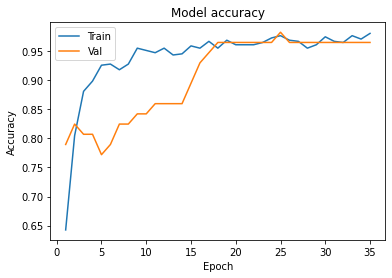

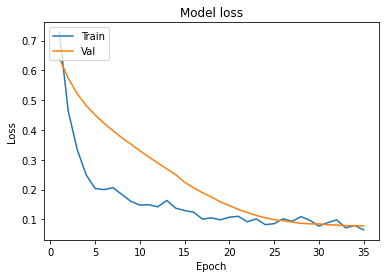

In [221]:
plot_learningCurve(history, epochs)